# Sentiment Analysis using Deep Learning in Keras

### Importing Required Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from numpy import array, asarray, zeros
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten, GlobalMaxPooling1D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
from keras.layers import Conv1D
from keras.layers import LSTM

### Importing Dataset

Dataset 1 link: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset 2 link: https://github.com/vineetdhanawat/twitter-sentiment-analysis/blob/master/datasets/Sentiment%20Analysis%20Dataset%20100000.csv

In [2]:
df = []
df.append(pd.read_csv('data/IMDB Dataset.csv', nrows = 10000))
df.append(pd.read_csv('data/Sentiment Analysis Dataset 100000.csv', encoding = 'latin-1', nrows = 10000))
df[1].drop(['ItemID'], axis = 'columns', inplace = True)

In [3]:
df[0].head(5)

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df[1].head(5)

,sentiment,text
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [5]:
df[0]['text'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
df[1]['text'][0]

'                     is so sad for my APL friend.............'

In [7]:
for i in df:
    print(i.isnull().values.any())

False
False


<AxesSubplot:xlabel='sentiment', ylabel='count'>

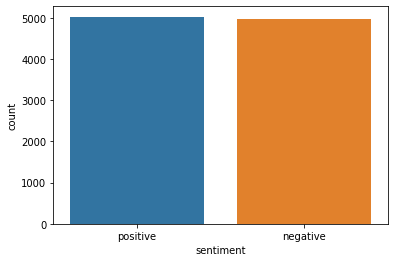

In [8]:
sns.countplot(x = 'sentiment', data = df[0])

<AxesSubplot:xlabel='sentiment', ylabel='count'>

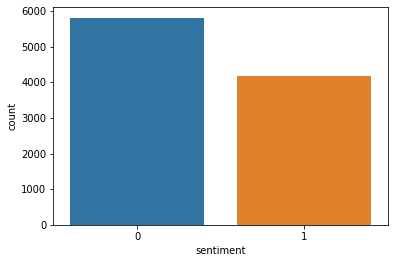

In [9]:
sns.countplot(x = 'sentiment', data = df[1])

## Data Processing

#### Dataset 1 Cleaning

In [10]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_html_tags(sen):
    return TAG_RE.sub('', sen)

In [11]:
def data_processing_1(sen):
    sen = remove_html_tags(sen) # remove html tag
    sen = sen.replace('n\'t', ' not') # convert n't to not
    sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen) # remove single letter
    sen = re.sub(r'\s+', ' ', sen) # remove multiple spaces
    sen = re.sub(r'[.]+', '.', sen) # remove multiple dots
    sen = sen.replace('\\\'', ' ') # remove \
    return sen

In [12]:
X = [["0"]*10000]*3

In [13]:
sentences = list(df[0]['text'])
i = 0

for sen in sentences:
    X[0][i] = data_processing_1(sen)
    i = i + 1

X[0] = np.array(list(X[0]))

In [14]:
for i in range(0, 3):
    print(X[0][i], end = '\n\n')

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many.Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more.so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows would not

In [15]:
y = [[0]*10000]*3
y[0] = df[0]['sentiment']
y[0] = np.array(list(map(lambda x: 1 if x == "positive" else 0, y[0])))

In [16]:
for i in range(0, 5):
    print(y[0][i], end = ', ')

1, 1, 1, 0, 1, 

In [17]:
print(np.shape(X[0]))
print(np.shape(y[0]))

(10000,)
(10000,)


#### Dataset 2 Cleaning

In [18]:
def data_processing_2(sen):
    sen = sen.replace('&quot;3', '')
    sen = sen.replace('&quot;', '')
    sen = sen.replace('&lt;3', '')
    sen = sen.replace('&lt;', '')
    sen = sen.replace('&gt;', '')
    sen = re.sub('http[s]?://\S+', '', sen)
    sen = re.sub('[a-zA-Z0-9]*@[a-zA-Z0-9]*', '', sen)
    sen = sen.replace('an\'t', 'an not')
    sen = sen.replace('n\'t', ' not')
    sen = re.sub(r"\s+[A-Z]\s+", ' ', sen)
    sen = re.sub(r'[.]+', '.', sen)
    sen = re.sub(r'\s+', ' ', sen)
    sen = re.sub(r'[-]+', ' ', sen)
    return sen

In [19]:
sentences = list(df[1]['text'])
i = 0

for sen in sentences:
    X[1][i] = data_processing_2(sen)
    i = i + 1
    
X[1] = np.array(list(X[1]))

In [20]:
y[1] = np.array(list(df[1]['sentiment']))

In [21]:
for i in range(0, 10):
    print(y[1][i], end = ',')

0,0,1,0,0,0,1,0,1,1,

In [22]:
print(np.shape(X[1]))
print(np.shape(y[1]))

(10000,)
(10000,)


#### Combine Dataset

In [23]:
for i in range(0, 5000):
    X[2][i] = X[0][i]
    y[2][i] = y[0][i]
for i in range(5000, 10000):
    X[2][i] = X[1][i]
    y[2][i] = y[1][i]
    
X[2] = np.array(X[2])
y[2] = np.array(y[2])

In [24]:
print(np.shape(X[2]))
print(np.shape(y[2]))

(10000,)
(10000,)


In [25]:
for sen in range(0, 3):
    print(y[2][sen], X[2][sen], end = '\n\n')
for sen in range(5000, 5003):
    print(y[2][sen], X[2][sen], end = '\n\n')

1 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many.Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more.so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows would n

#### Dataset splitting to train and test

In [26]:
X_train = [[]] * 3
X_test = [[]] * 3
y_train = [[]] * 3
y_test = [[]] * 3

In [27]:
for i in range(0, 3):
    print('dataset ', i+1, ': ', np.shape(X[i]), ', ', np.shape(y[i]), end = '\n')

dataset  1 :  (10000,) ,  (10000,)
dataset  2 :  (10000,) ,  (10000,)
dataset  3 :  (10000,) ,  (10000,)


In [28]:
for i in range(0, 3):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(
        X[i], y[i], test_size = 0.25,
        random_state = 42
    )

In [29]:
for i in range(0, 10):
    print(i, ': ', y_test[1][i], ' --> ', X_train[1][i])

0 :  0  -->  #f1 Rubens knows he has lost any chance of the world championship
1 :  0  -->  #3turnoffwords   Isit in yet
2 :  1  -->  #FollowFriday is a ferociously gifted writer whose books &amp; Tweets are magical must reads. Follow &amp; you'll LOVE her too
3 :  0  -->  My heart sings when think of youuu haha that's all keep singing today. I'm craving cheeto puffs unhealthy!
4 :  0  -->   guys are pricks. gonna have an early night and cry til i fall asleep. fuck you all.
5 :  1  -->  #faviphoneapp Black Book. But since only have a Touch it's not as fun. But it's still a great junt organizer
6 :  0  -->  #musicmonday Crossfire   On Fire
7 :  1  -->  #3wordsaftersex 'I broke it?!?!' lol
8 :  0  -->  ! .sooo, any hope for a match up with Liz Cheney and Mikas Daddy? thx!! Ratings Gold I'm sure!! 
9 :  0  -->   u guys knw whyy


### Preparing Embedding Layer

In [30]:
tokenizer = Tokenizer(num_words = 50000)

for i in range(3):
    tokenizer.fit_on_texts(X_train[i])

In [31]:
for i in range(3):
    X_train[i] = tokenizer.texts_to_sequences(X_train[i])

In [32]:
for i in range(3):
    X_test[i] = tokenizer.texts_to_sequences(X_test[i])

In [33]:
maxlen = 100
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

57961


In [34]:
for i in range(3):
    X_train[i] = pad_sequences(
        X_train[i],
        padding = 'post',
        maxlen = maxlen
    )

In [35]:
for i in range(3):
    X_test[i] = pad_sequences(
        X_test[i],
        padding = 'post',
        maxlen = maxlen
    )

#### glove.6B.100d.txt Dataset for GloVe Embedding

dataset link: https://www.kaggle.com/danielwillgeorge/glove6b100dtxt

In [36]:
embed_dictionary = dict()
glv_file = open('data/glove.6B.100d.txt', encoding='utf8')

In [37]:
for line in glv_file:
    records = line.split()
    word = records[0]
    vector_dim = asarray(records[1:], dtype='float32')
    embed_dictionary[word] = vector_dim
glv_file.close()

In [38]:
embed_matrix = zeros((vocab_size, 100))

In [39]:
for word, index in tokenizer.word_index.items():
    embed_vector = embed_dictionary.get(word)
    if embed_vector is not None:
        embed_matrix[index] = embed_vector

In [40]:
embed_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

## Text Classification with Simple Neural Network

In [41]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(Flatten())

In [42]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)

In [43]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          5796100   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 5,806,101
Trainable params: 10,001
Non-trainable params: 5,796,100
_________________________________________________________________


In [45]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 0s 6ms/step - loss: 0.6938 - acc: 0.5818 - val_loss: 0.6435 - val_acc: 0.6333
Epoch 2/6
47/47 [==============================] - 0s 4ms/step - loss: 0.5236 - acc: 0.7537 - val_loss: 0.5967 - val_acc: 0.6820
Epoch 3/6
47/47 [==============================] - 0s 4ms/step - loss: 0.4504 - acc: 0.8085 - val_loss: 0.5743 - val_acc: 0.7060
Epoch 4/6
47/47 [==============================] - 0s 5ms/step - loss: 0.3907 - acc: 0.8575 - val_loss: 0.5697 - val_acc: 0.6987
Epoch 5/6
47/47 [==============================] - 0s 5ms/step - loss: 0.3537 - acc: 0.8760 - val_loss: 0.5735 - val_acc: 0.6993
Epoch 6/6
47/47 [==============================] - 0s 5ms/step - loss: 0.3168 - acc: 0.9072 - val_loss: 0.5812 - val_acc: 0.6953
Epoch 1/6
47/47 [==============================] - 0s 6ms/step - loss: 0.6431 - acc: 0.6310 - val_loss: 0.6221 - val_acc: 0.6533
Epoch 2/6
47/47 [==============================] - 0s 4ms/step - loss: 0.5974 - acc: 0.6843 - val

In [46]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 0s 1ms/step - loss: 0.3882 - acc: 0.8460

dataset 1: loss - 0.36839982867240906, acc - 0.8505333065986633

dataset 2: loss - 0.571892499923706, acc - 0.7090666890144348

dataset 3: loss - 0.3881690502166748, acc - 0.8460000157356262


In [47]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 0s 1ms/step - loss: 0.6688 - acc: 0.6648

dataset 1: loss - 0.6785476803779602, acc - 0.6876000165939331

dataset 2: loss - 0.6465015411376953, acc - 0.6384000182151794

dataset 3: loss - 0.6688228845596313, acc - 0.6647999882698059


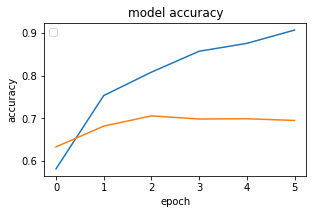

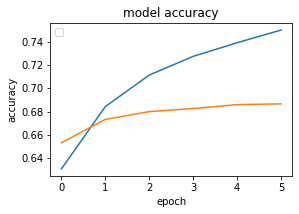

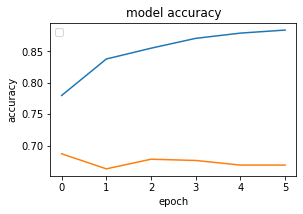

In [48]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

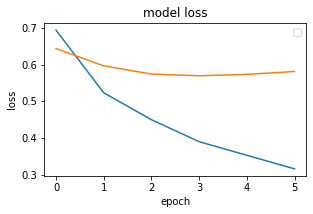

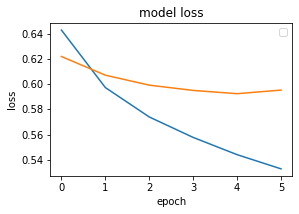

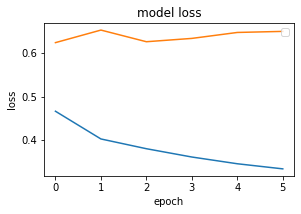

In [49]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with CNN

In [50]:
model = Sequential()

embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)

In [51]:
model.add(
    Conv1D(128, 5,
        activation = 'relu'
    )
)
model.add(GlobalMaxPooling1D())
model.add(
    Dense(1,
          activation = 'sigmoid'
    )
)

In [52]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 5,860,357
Trainable params: 64,257
Non-trainable params: 5,796,100
_________________________________________________________________


In [54]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 2s 50ms/step - loss: 0.6295 - accuracy: 0.6555 - val_loss: 0.5551 - val_accuracy: 0.7247
Epoch 2/6
47/47 [==============================] - 2s 44ms/step - loss: 0.4819 - accuracy: 0.8013 - val_loss: 0.4765 - val_accuracy: 0.7867
Epoch 3/6
47/47 [==============================] - 2s 38ms/step - loss: 0.3992 - accuracy: 0.8467 - val_loss: 0.4518 - val_accuracy: 0.7900
Epoch 4/6
47/47 [==============================] - 2s 39ms/step - loss: 0.3452 - accuracy: 0.8705 - val_loss: 0.4122 - val_accuracy: 0.8167
Epoch 5/6
47/47 [==============================] - 2s 44ms/step - loss: 0.2936 - accuracy: 0.9038 - val_loss: 0.4108 - val_accuracy: 0.8100
Epoch 6/6
47/47 [==============================] - 2s 43ms/step - loss: 0.2557 - accuracy: 0.9235 - val_loss: 0.3912 - val_accuracy: 0.8160
Epoch 1/6
47/47 [==============================] - 2s 44ms/step - loss: 0.6197 - accuracy: 0.6850 - val_loss: 0.5731 - val_accuracy: 0.7147
Epoch 2/6
47/47 [===

In [55]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 1s 4ms/step - loss: 0.1920 - accuracy: 0.9449

dataset 1: loss - 0.22627300024032593, acc - 0.9153333306312561

dataset 2: loss - 0.3170439600944519, acc - 0.8787999749183655

dataset 3: loss - 0.19201935827732086, acc - 0.9449333548545837


In [56]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.7492

dataset 1: loss - 0.44862401485443115, acc - 0.7911999821662903

dataset 2: loss - 0.6153467297554016, acc - 0.7035999894142151

dataset 3: loss - 0.5274851322174072, acc - 0.7491999864578247


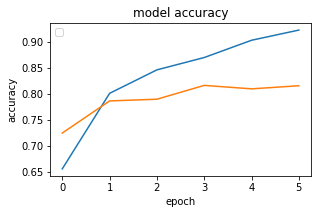

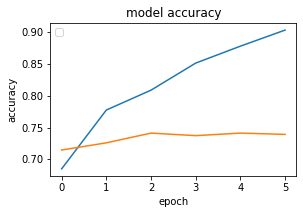

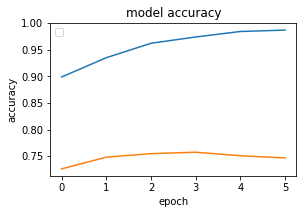

In [57]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['accuracy'])
    plt.plot(hist[i].history['val_accuracy'])
    plt.tight_layout(pad=1.0)

plt.show()

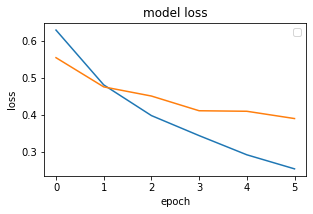

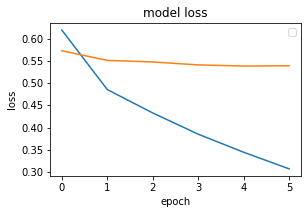

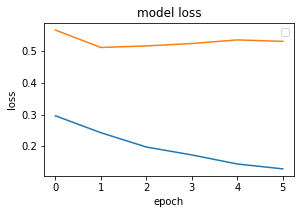

In [58]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with LSTM

In [59]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(LSTM(128))

In [60]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 5,913,477
Trainable params: 117,377
Non-trainable params: 5,796,100
_________________________________________________________________


In [62]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 8s 170ms/step - loss: 0.6413 - acc: 0.6295 - val_loss: 0.5895 - val_acc: 0.6900
Epoch 2/6
47/47 [==============================] - 9s 202ms/step - loss: 0.5457 - acc: 0.7237 - val_loss: 0.4959 - val_acc: 0.7700
Epoch 3/6
47/47 [==============================] - 7s 148ms/step - loss: 0.5098 - acc: 0.7575 - val_loss: 0.4872 - val_acc: 0.7733
Epoch 4/6
47/47 [==============================] - 7s 142ms/step - loss: 0.4941 - acc: 0.7657 - val_loss: 0.4887 - val_acc: 0.7640
Epoch 5/6
47/47 [==============================] - 7s 145ms/step - loss: 0.4781 - acc: 0.7722 - val_loss: 0.4655 - val_acc: 0.7867
Epoch 6/6
47/47 [==============================] - 8s 164ms/step - loss: 0.4523 - acc: 0.7887 - val_loss: 0.4470 - val_acc: 0.7880
Epoch 1/6
47/47 [==============================] - 9s 186ms/step - loss: 0.6887 - acc: 0.5797 - val_loss: 0.6824 - val_acc: 0.5733
Epoch 2/6
47/47 [==============================] - 8s 174ms/step - loss: 0.6784 - a

In [63]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 5s 21ms/step - loss: 0.4869 - acc: 0.7749

dataset 1: loss - 0.4069167971611023, acc - 0.8216000199317932

dataset 2: loss - 0.6664188504219055, acc - 0.7039999961853027

dataset 3: loss - 0.48685401678085327, acc - 0.7749333381652832


In [64]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 2s 19ms/step - loss: 0.5498 - acc: 0.7452

dataset 1: loss - 0.4722077250480652, acc - 0.7860000133514404

dataset 2: loss - 0.686953067779541, acc - 0.6899999976158142

dataset 3: loss - 0.5498132109642029, acc - 0.745199978351593


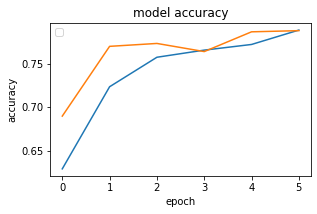

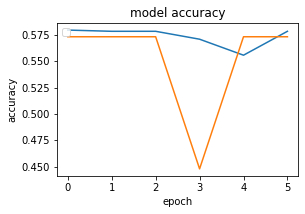

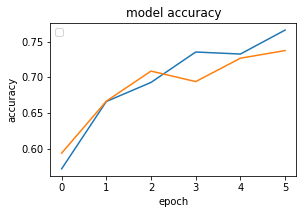

In [65]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

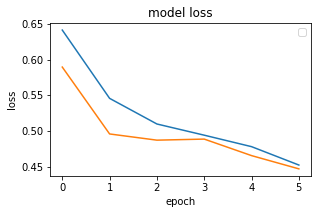

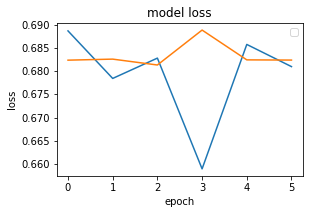

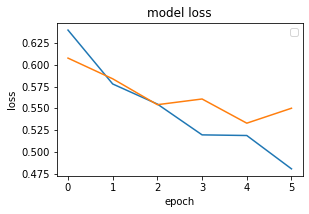

In [66]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with Bi-Directional LSTM

In [67]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

model = Sequential()
embed_layer = Embedding(
    vocab_size,
    100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(
    Bidirectional(
        LSTM(
            100,
            return_sequences = True,
            dropout = 0.50
        ),
        merge_mode = 'concat'
    )
)
model.add(
    TimeDistributed(
        Dense(
            100,
            activation = 'sigmoid'
        )
    )
)
model.add(Flatten())

In [68]:
model.add(
    Dense(
        100,
        activation = 'sigmoid'
    )
)
model.add(
    Dense(
        3,
        activation = 'softmax'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 200)          160800    
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 100)          20100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1000100   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 6,977,403
Trainable params: 1,181,303
Non-trainable params: 5,796,100
____________________________________

In [70]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 11s 233ms/step - loss: 1.1249 - acc: 0.4888 - val_loss: 0.8540 - val_acc: 0.4960
Epoch 2/6
47/47 [==============================] - 12s 247ms/step - loss: 0.7678 - acc: 0.2550 - val_loss: 0.7554 - val_acc: 0.0000e+00
Epoch 3/6
47/47 [==============================] - 12s 264ms/step - loss: 0.7512 - acc: 0.3668 - val_loss: 0.7548 - val_acc: 0.0000e+00
Epoch 4/6
47/47 [==============================] - 12s 246ms/step - loss: 0.7511 - acc: 0.2037 - val_loss: 0.7548 - val_acc: 0.4960
Epoch 5/6
47/47 [==============================] - 12s 260ms/step - loss: 0.7511 - acc: 0.2125 - val_loss: 0.7548 - val_acc: 0.4947
Epoch 6/6
47/47 [==============================] - 10s 222ms/step - loss: 0.7511 - acc: 0.2225 - val_loss: 0.7548 - val_acc: 0.0967
Epoch 1/6
47/47 [==============================] - 10s 220ms/step - loss: 0.6976 - acc: 0.2877 - val_loss: 0.7012 - val_acc: 0.5647
Epoch 2/6
47/47 [==============================] - 10s 217ms/step - 

In [71]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 6s 23ms/step - loss: 0.7691 - acc: 0.2371

dataset 1: loss - 0.7518537640571594, acc - 0.0272000003606081

dataset 2: loss - 0.6983428597450256, acc - 0.5774666666984558

dataset 3: loss - 0.7691359519958496, acc - 0.23706667125225067


In [72]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 2s 21ms/step - loss: 0.7592 - acc: 0.2428

dataset 1: loss - 0.7603561282157898, acc - 0.02239999920129776

dataset 2: loss - 0.6879917979240417, acc - 0.5920000076293945

dataset 3: loss - 0.7592472434043884, acc - 0.24279999732971191


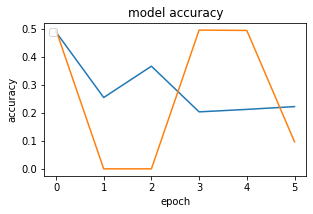

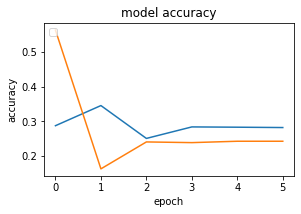

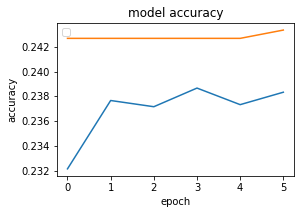

In [73]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

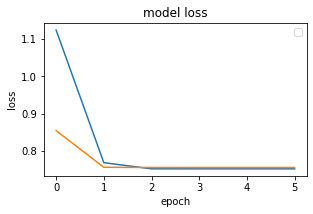

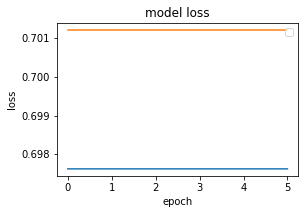

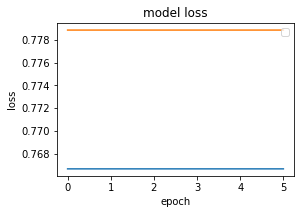

In [74]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with GRU

In [75]:
from keras.layers.recurrent import GRU

In [76]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(
    GRU(256)
)

In [77]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
gru (GRU)                    (None, 256)               274944    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 6,071,301
Trainable params: 275,201
Non-trainable params: 5,796,100
_________________________________________________________________


In [79]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 13s 279ms/step - loss: 0.6666 - acc: 0.5842 - val_loss: 0.6300 - val_acc: 0.6440
Epoch 2/6
47/47 [==============================] - 13s 274ms/step - loss: 0.5851 - acc: 0.6880 - val_loss: 0.5342 - val_acc: 0.7393
Epoch 3/6
47/47 [==============================] - 13s 273ms/step - loss: 0.4775 - acc: 0.7730 - val_loss: 0.4374 - val_acc: 0.7967
Epoch 4/6
47/47 [==============================] - 15s 311ms/step - loss: 0.4212 - acc: 0.8058 - val_loss: 0.4018 - val_acc: 0.8180
Epoch 5/6
47/47 [==============================] - 13s 273ms/step - loss: 0.3884 - acc: 0.8230 - val_loss: 0.4097 - val_acc: 0.8173
Epoch 6/6
47/47 [==============================] - 14s 289ms/step - loss: 0.3625 - acc: 0.8392 - val_loss: 0.4216 - val_acc: 0.8060
Epoch 1/6
47/47 [==============================] - 14s 307ms/step - loss: 0.6866 - acc: 0.5773 - val_loss: 0.6830 - val_acc: 0.5733
Epoch 2/6
47/47 [==============================] - 15s 318ms/step - loss: 0.

In [80]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 13s 54ms/step - loss: 0.4100 - acc: 0.8011

dataset 1: loss - 0.3307272493839264, acc - 0.8625333309173584

dataset 2: loss - 0.5471307039260864, acc - 0.7281333208084106

dataset 3: loss - 0.4100341200828552, acc - 0.8010666370391846


In [81]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 3s 34ms/step - loss: 0.5289 - acc: 0.7384

dataset 1: loss - 0.46765264868736267, acc - 0.8015999794006348

dataset 2: loss - 0.5714684128761292, acc - 0.7111999988555908

dataset 3: loss - 0.5288749933242798, acc - 0.7383999824523926


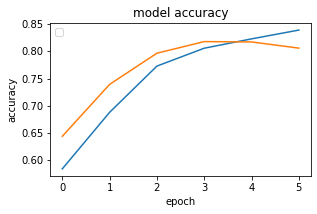

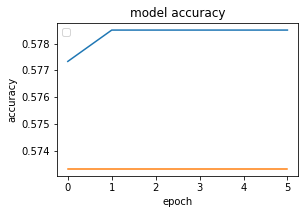

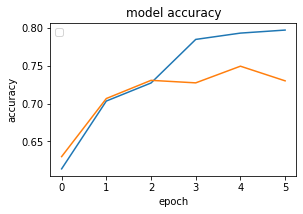

In [82]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

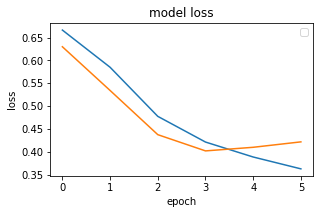

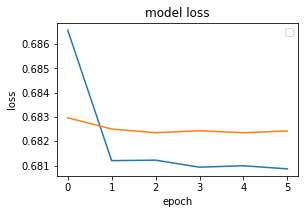

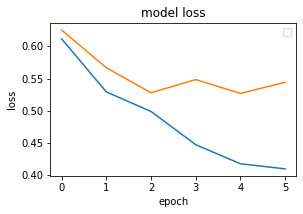

In [83]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

In [84]:
model.save('model.m5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model.m5/assets
